### General Imports

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re

### Collecting interpolated and averaged files

In [6]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv', './interpolatedData\\S-BU2.csv']


In [8]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR16 Blocked 1.csv', './stretchedAvgData\\OR16 Blocked 2.csv', './stretchedAvgData\\OR16 Unblocked.csv', './stretchedAvgData\\OR7 Blocked.csv', './stretchedAvgData\\OR7 Unblocked.csv']


In [10]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData\\OR16 Blocked 1 Exp1.csv', './stretchedExpirementData\\OR16 Blocked 1 Exp2.csv', './stretchedExpirementData\\OR16 Blocked 1 Exp3.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp1.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp2.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp3.csv', './stretchedExpirementData\\OR16 Unblocked Exp1.csv', './stretchedExpirementData\\OR16 Unblocked Exp2.csv', './stretchedExpirementData\\OR16 Unblocked Exp3.csv', './stretchedExpirementData\\OR7 Blocked Exp1.csv', './stretchedExpirementData\\OR7 Blocked Exp2.csv', './stretchedExpirementData\\OR7 Blocked Exp3.csv', './stretchedExpirementData\\OR7 Unblocked Exp1.csv', './stretchedExpirementData\\OR7 Unblocked Exp2.csv', './stretchedExpirementData\\OR7 Unblocked Exp3.csv']


### A little bit more data cleaning

In [12]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [14]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [16]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [18]:
stExpDf = {}
for x in expData:
    name = x.split('\\')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


In [20]:
stExpDf['OR16 Unblocked Exp2']

,S-01,S-03,S-04,S-05,S-06,S-07,S-08,S-09,S-11,S-12,...,Average,Variance,Zone 1,Var Z1,Zone 2,Var Z2,Zone 3,Var Z3,Zone 4,Var Z4
0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,9.0,9.0,...,19.666667,41.207807,85.50,76.50,6.0,4.242641,2.2500,3.897114,79.0,1.0
1,0.0,0.0,0.0,9.0,8.1,0.0,0.0,0.0,10.2,9.0,...,18.520000,38.907122,81.15,72.15,6.4,4.678609,2.1375,3.805050,71.1,1.0
2,0.0,0.0,0.0,9.0,7.2,0.0,0.0,0.0,11.4,9.0,...,17.373333,36.606438,76.80,67.80,6.8,5.114578,2.0250,3.712985,63.2,1.0
3,0.0,0.0,0.0,9.0,6.3,0.0,0.0,0.0,12.6,9.0,...,16.226667,34.305753,72.45,63.45,7.2,5.550546,1.9125,3.620921,55.3,1.0
4,0.0,0.0,0.0,9.0,5.4,0.0,0.0,0.0,13.8,9.0,...,15.080000,32.005069,68.10,59.10,7.6,5.986515,1.8000,3.528857,47.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,30.0,3.6,0.0,25.2,10.8,36.0,0.0,30.0,14.4,16.2,...,14.040000,13.283706,12.90,12.90,20.2,7.019210,13.2000,14.710440,6.0,1.0
287,30.0,2.7,0.0,23.4,12.6,36.0,0.0,30.0,15.3,17.4,...,13.746667,12.896775,10.80,10.80,20.9,6.539162,13.0875,14.505379,5.5,1.0
288,30.0,1.8,0.0,21.6,14.4,36.0,0.0,30.0,16.2,18.6,...,13.453333,12.509845,8.70,8.70,21.6,6.059115,12.9750,14.300317,5.0,1.0
289,30.0,0.9,0.0,19.8,16.2,36.0,0.0,30.0,17.1,19.8,...,13.160000,12.122915,6.60,6.60,22.3,5.579067,12.8625,14.095256,4.5,1.0


### Plotting average and variance

Text(0.5, 1.0, 'Variance in Particles')

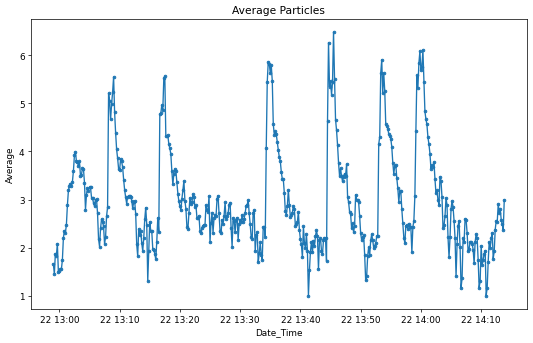

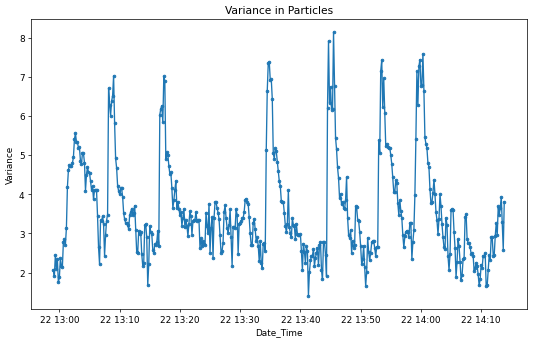

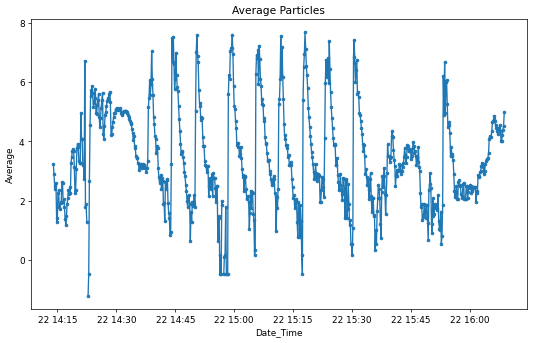

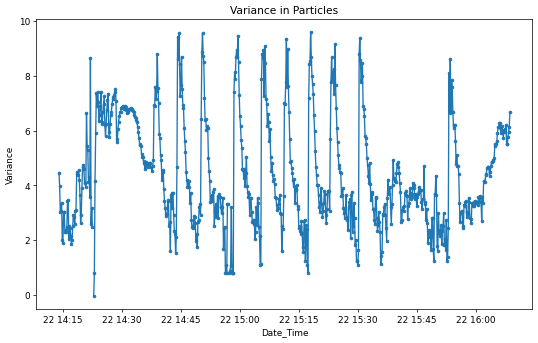

In [22]:
split = 450

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(4, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

Color Definitions

In [24]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### Looking at each expirements data

In [26]:
indexList = {}
thresh = 1.5
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

153 seconds OR16 Blocked 1
136 seconds OR16 Blocked 2
117 seconds OR16 Unblocked
144 seconds OR7 Blocked
123 seconds OR7 Unblocked


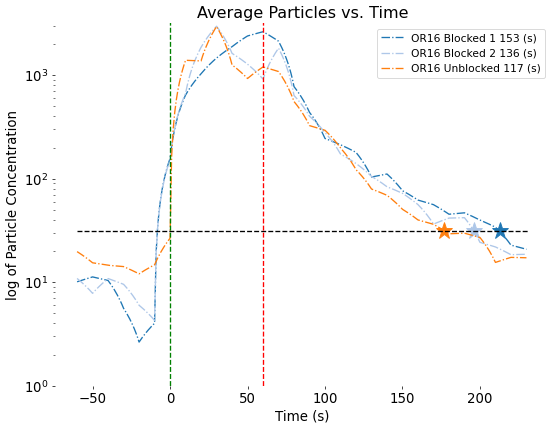

In [28]:
for idx,x in enumerate(stAvgDf):
    if re.match("OR7",x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,'-.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')


ax.plot([-60,len(stAvgDf[x])-60],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([1,10**3.5])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

Text(0.5, 1.0, 'Outdoor Sensor Readings vs. Time')

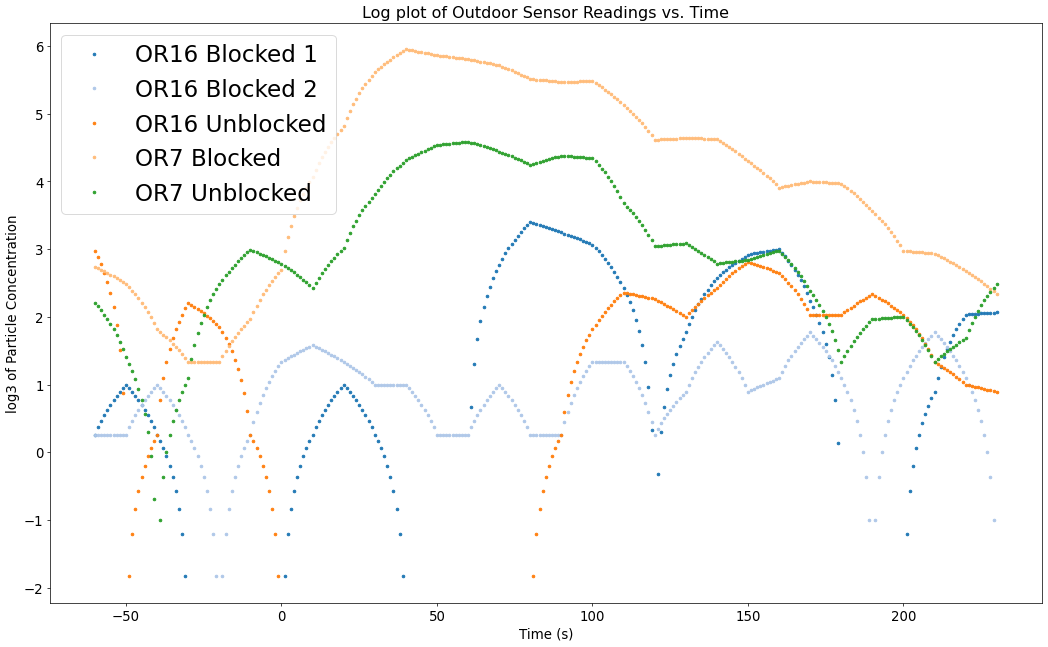

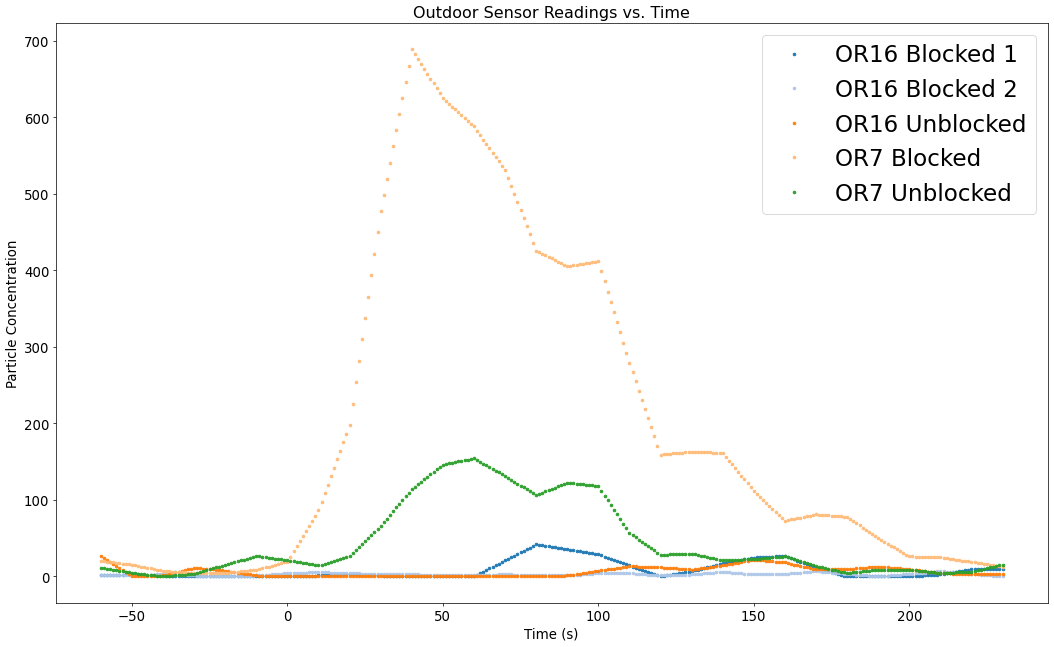

In [30]:
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    plt.title('Log plot of Outdoor Sensor Readings vs. Time')
    fig2 = plt.figure(1, figsize=(20,12), dpi=64)
    ax = fig.gca()
    ax2 = fig2.gca()
    yData = stAvgDf[x]['S-BU1']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)/np.log(3),'.',color = color[idx],label = x)

    ax2.plot([i for i in range(-60,len(yData)-60)],yData,'.',color = color[idx],label = x)


ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log3 of Particle Concentration')
ax2.legend(fontsize = 'xx-large')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Particle Concentration')
plt.title('Outdoor Sensor Readings vs. Time')

### Linear Regression

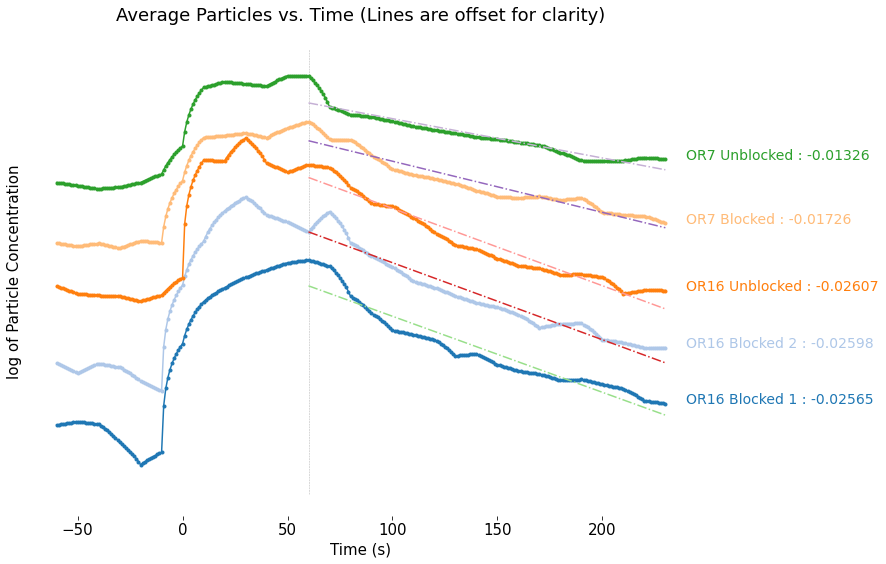

In [32]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


In [34]:
tmp = {}
for idx,x in enumerate(stAvgDf):
    print(x)
    columns = []
    tmp[x] = []
    for label in stAvgDf[x]:
        if (label == 'Average') or (label == 'Variance'):
            continue
        columns.append(label)
        yPoints = np.log(np.array(stAvgDf[x][label][120:],dtype=float))
        xPoints = np.array([i+60 for i in range(len(yPoints))])
        m,b = np.polyfit(xPoints,yPoints,1)
        tmp[x].append(round(m,3))
        print(label,round(m,3))
    
    

OR16 Blocked 1
S-01 nan
S-03 nan
S-04 0.011
S-05 -0.021
S-06 -0.005
S-07 -0.016
S-08 nan
S-09 -0.013
S-11 -0.024
S-12 -0.027
S-13 -0.029
S-14 -0.031
S-15 nan
S-BU1 nan
S-BU2 nan
Zone 1 -0.03
Var Z1 -0.029
Zone 2 -0.022
Var Z2 -0.026
Zone 3 -0.009
Var Z3 -0.009
Zone 4 nan
Var Z4 0.0
OR16 Blocked 2
S-01 -0.001
S-03 nan
S-04 nan
S-05 -0.021
S-06 nan
S-07 nan
S-08 nan
S-09 -0.012
S-11 -0.016
S-12 -0.033
S-13 -0.038
S-14 -0.025
S-15 0.006
S-BU1 nan
S-BU2 nan
Zone 1 -0.032
Var Z1 -0.035
Zone 2 -0.025
Var Z2 -0.03
Zone 3 -0.012
Var Z3 -0.014
Zone 4 nan
Var Z4 0.0
OR16 Unblocked
S-01 -0.0
S-03 nan
S-04 nan
S-05 -0.012
S-06 -0.006
S-07 nan
S-08 nan
S-09 nan
S-11 -0.032
S-12 -0.025
S-13 -0.039
S-14 -0.028
S-15 nan
S-BU1 nan
S-BU2 nan
Zone 1 -0.033
Var Z1 -0.03
Zone 2 -0.026
Var Z2 -0.029
Zone 3 -0.004
Var Z3 -0.006
Zone 4 nan
Var Z4 0.0
OR7 Blocked
S-01 0.007
S-03 -0.007
S-04 -0.006
S-05 -0.006
S-06 -0.008
S-07 -0.015
S-08 nan
S-09 -0.037
S-11 nan
S-12 -0.018
S-13 -0.017
S-14 -0.021
S-15 -0.012


In [36]:
refKeys = list(stAvgDf.keys())
dfColumns = stAvgDf[refKeys[0]].columns
len(dfColumns)
stAvgDf[refKeys[0]].iloc[:,19]

0       5.333333
1       4.900000
2       4.466667
3       4.033333
4       3.600000
         ...    
286    23.066667
287    21.300000
288    19.533333
289    17.766667
290    16.000000
Name: Zone 2, Length: 291, dtype: float64

In [38]:
for loop,zone in enumerate(stAvgDf[x].columns[17:]):
    stAvgDf[x][zone]

In [40]:

for count,el in enumerate(list(stAvgDf[x].columns)):
    print(count,el)

0 S-01
1 S-03
2 S-04
3 S-05
4 S-06
5 S-07
6 S-08
7 S-09
8 S-11
9 S-12
10 S-13
11 S-14
12 S-15
13 S-BU1
14 S-BU2
15 Average
16 Variance
17 Zone 1
18 Var Z1
19 Zone 2
20 Var Z2
21 Zone 3
22 Var Z3
23 Zone 4
24 Var Z4


### Plotting Data for Sensors

No handles with labels found to put in legend.


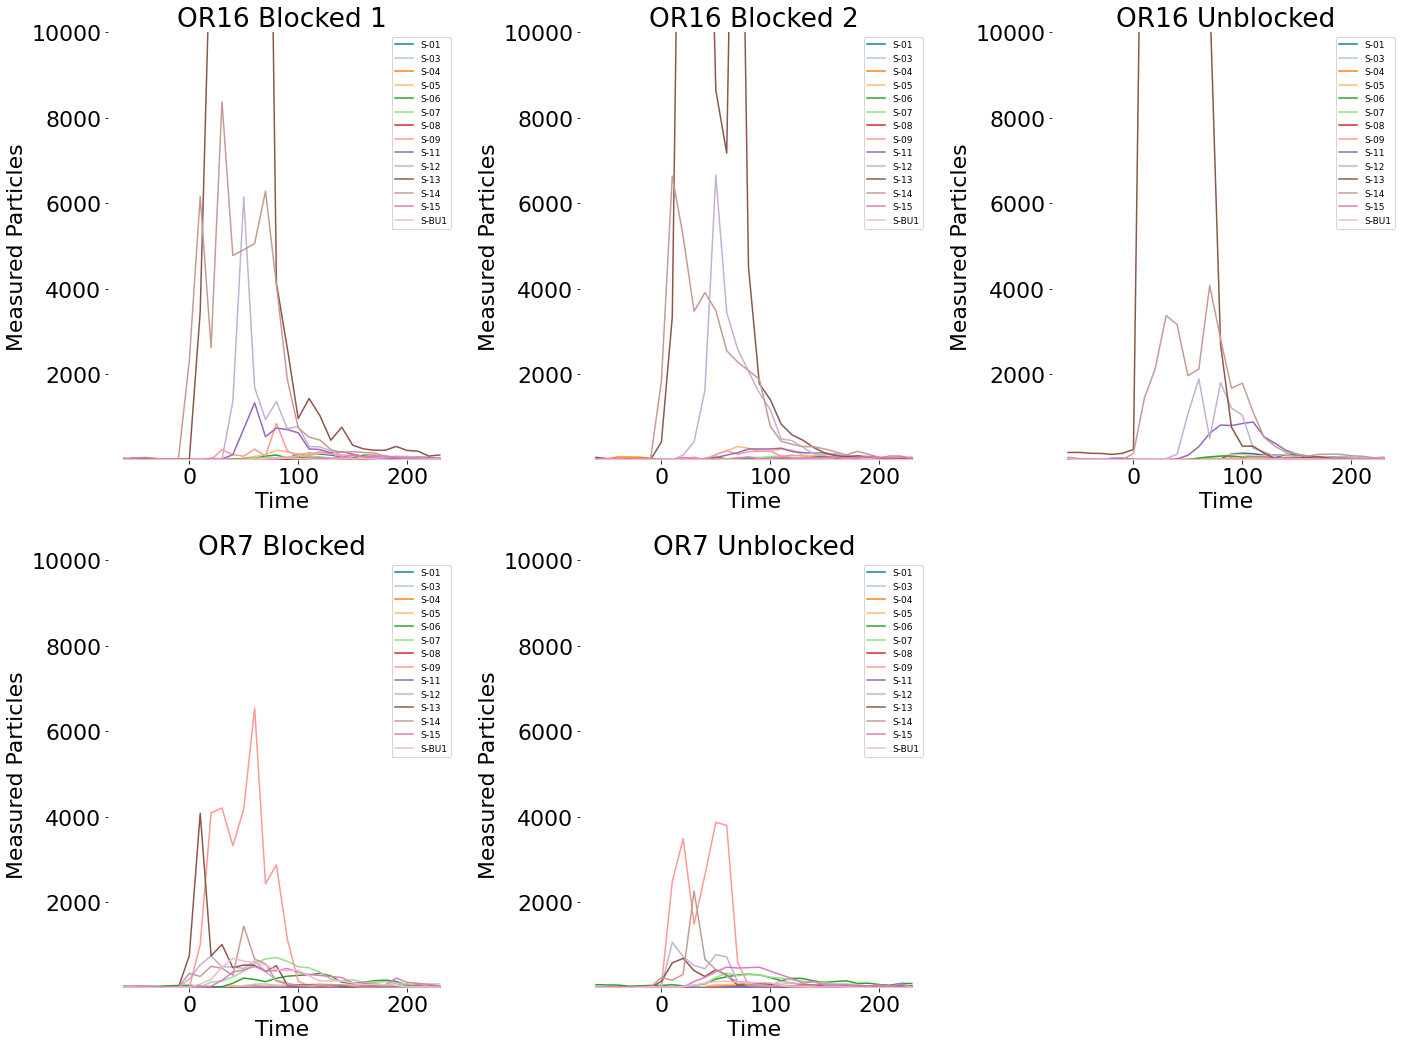

In [42]:

fig,sPlt=plt.subplots(2,3,sharex=False,sharey=False,figsize=(20,15))
fig.delaxes(sPlt[1,2])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:14]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 2 else 0][idx%3].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 2 else 0][idx%3].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 2 else 0][idx%3].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 2 else 0][idx%3].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,10**4])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

No handles with labels found to put in legend.


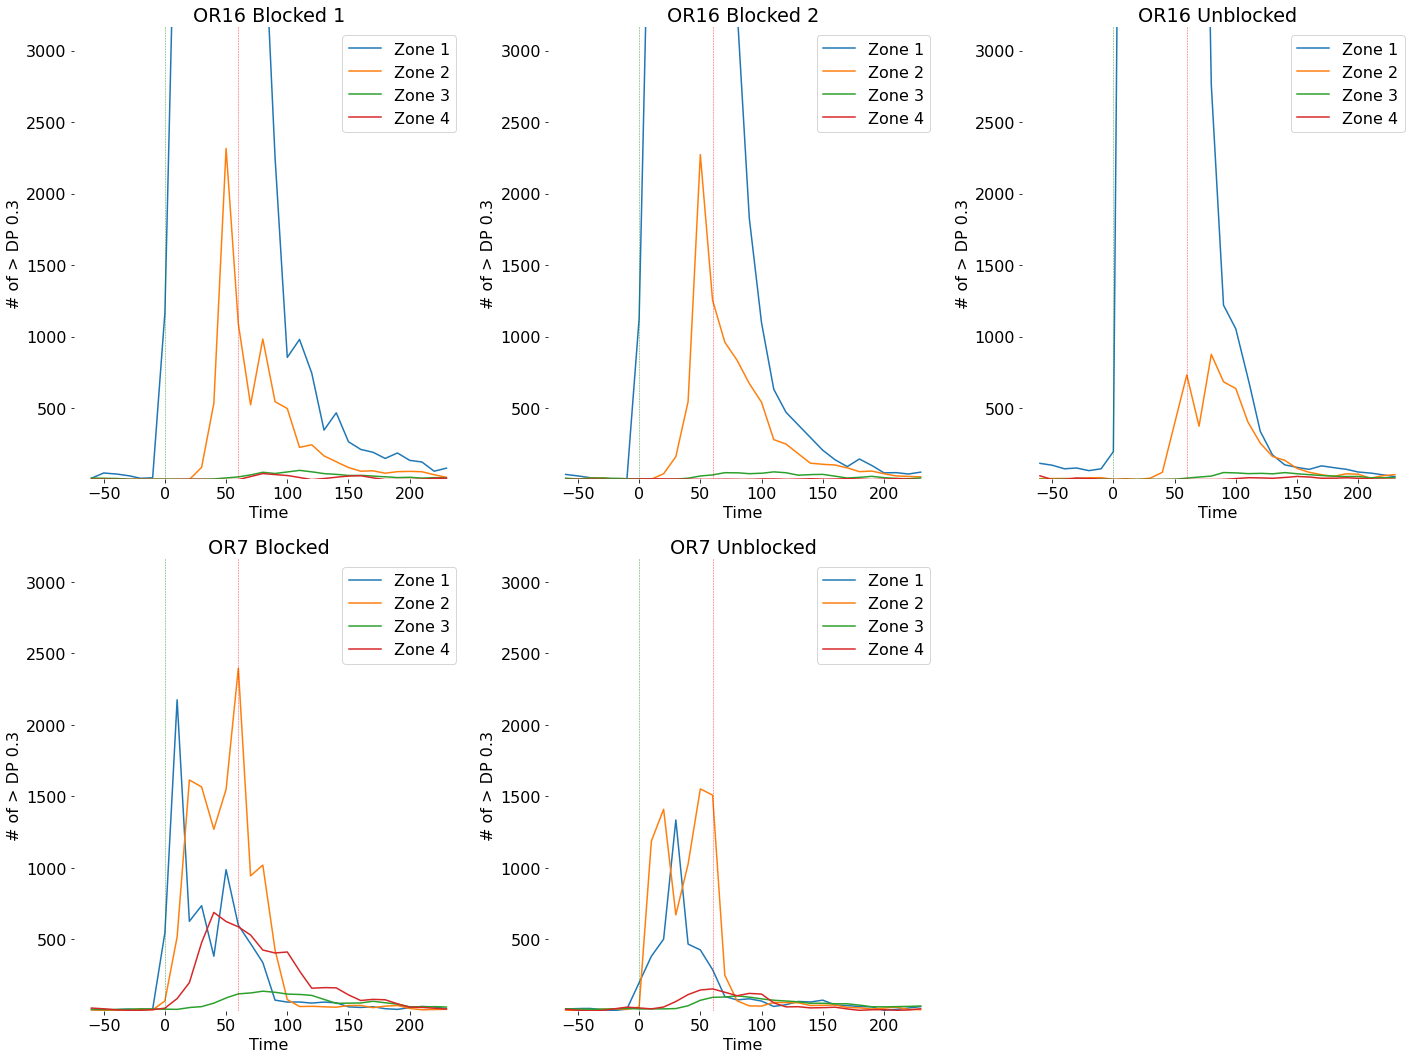

In [44]:

fig,sPlt=plt.subplots(2,3,sharex=False,sharey=False,figsize=(20,15))
fig.delaxes(sPlt[1,2])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[17:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 2 else 0][idx%3].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 2 else 0][idx%3].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 2 else 0][idx%3].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 2 else 0][idx%3].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        # ax.set_yscale('log')
        ax.set_ylim([1,10**3.5])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})

# sPlt.yscale("log")

# sPlt.ylim([1,10**2])


In [46]:
pd.date_range(pd.Timestamp('12:00'),pd.Timestamp('12:05'),freq = 'S')

DatetimeIndex(['2021-03-21 12:00:00', '2021-03-21 12:00:01',
               '2021-03-21 12:00:02', '2021-03-21 12:00:03',
               '2021-03-21 12:00:04', '2021-03-21 12:00:05',
               '2021-03-21 12:00:06', '2021-03-21 12:00:07',
               '2021-03-21 12:00:08', '2021-03-21 12:00:09',
               ...
               '2021-03-21 12:04:51', '2021-03-21 12:04:52',
               '2021-03-21 12:04:53', '2021-03-21 12:04:54',
               '2021-03-21 12:04:55', '2021-03-21 12:04:56',
               '2021-03-21 12:04:57', '2021-03-21 12:04:58',
               '2021-03-21 12:04:59', '2021-03-21 12:05:00'],
              dtype='datetime64[ns]', length=301, freq='S')

In [48]:
pd.read_csv

<function pandas.io.parsers.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

### Plotting Operating Room Vs. Hallway

No handles with labels found to put in legend.


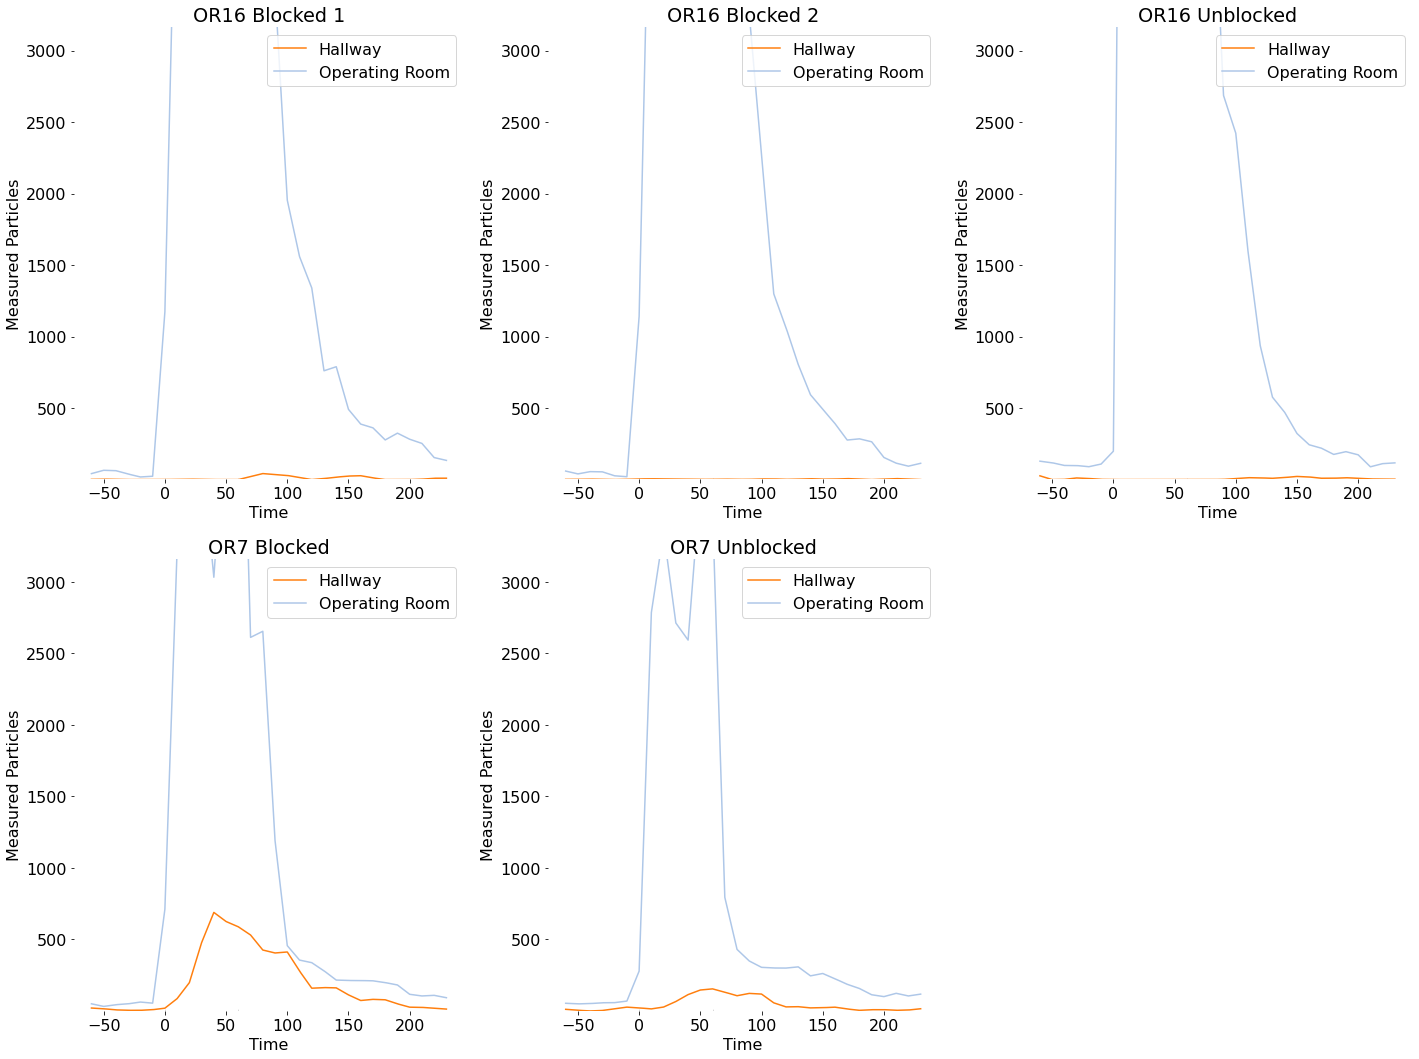

In [50]:

fig,sPlt=plt.subplots(2,3,sharex=False,sharey=False,figsize=(20,15))
fig.delaxes(sPlt[1,2])
xData = [i for i in range(-60,len(yData)-60)]
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    yData = (DataFrame[x]['Zone 1'])
    for loop,zone in enumerate(DataFrame[x].columns[18:]):
        # if True: 

        if re.match(r"Zone",zone):
            if zone == 'Zone 4':
                sPlt[1 if idx > 2 else 0][idx%3].errorbar(xData,yData,color = color[1],label = 'Operating Room')
                yData = (DataFrame[x][zone])
                sPlt[1 if idx > 2 else 0][idx%3].plot(xData,yData,color = color[2],label = 'Hallway')
            else:
                yData += (DataFrame[x][zone])


  
    sPlt[1 if idx > 2 else 0][idx%3].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 2 else 0][idx%3].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 2 else 0][idx%3].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        # ax.set_yscale('log')
        ax.set_ylim([1,10**3.5])
        

plt.tight_layout()
plt.rcParams.update({'font.size':16})


In [52]:
ls00011 = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
ls01201 = [0,0,0,1,1,1,2,2,2,0,0,0,1,1,1]

No handles with labels found to put in legend.


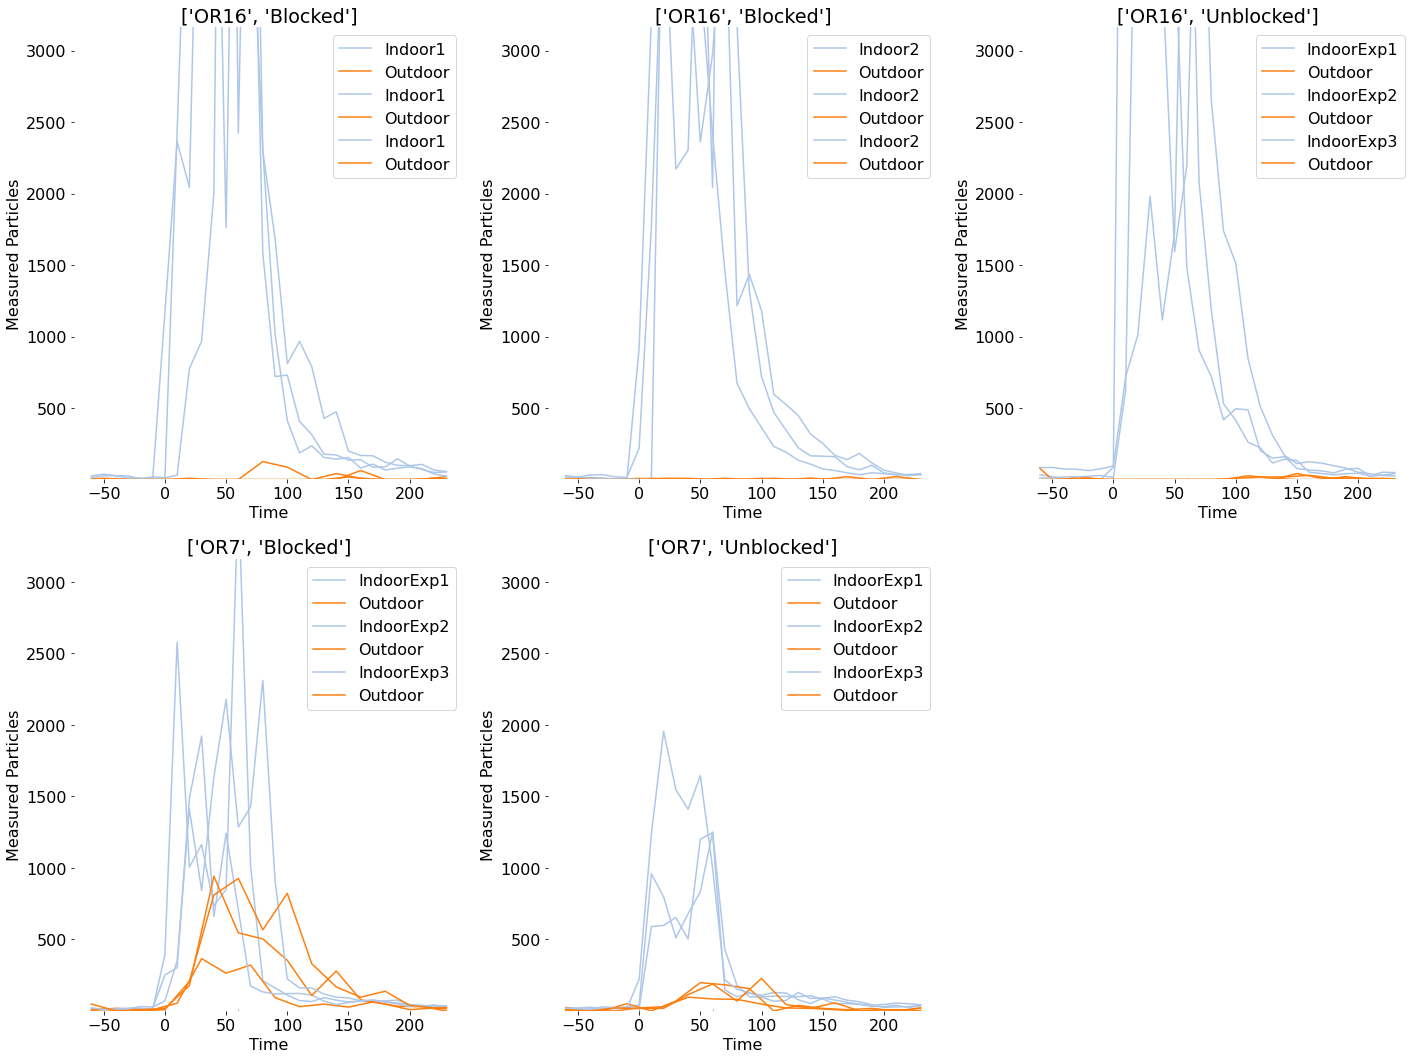

In [54]:

fig,sPlt=plt.subplots(2,3,sharex=False,sharey=False,figsize=(20,15))
fig.delaxes(sPlt[1,2])
xData = [i for i in range(-60,len(yData)-60)]
DataFrame = stExpDf

# idxFun = lambda x : 0 if x > 6 else 1 if x > 2 else 0

for idx,x in enumerate(DataFrame):
    yData = (DataFrame[x]['Zone 1'])
    for loop,zone in enumerate(DataFrame[x].columns[18:]):
        # if True: 

        if re.match(r"Zone",zone):
            if zone == 'Zone 4':
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,(yData)/3,color = color[1],label = 'Indoor' + str(x.split()[2]))
                yData = (DataFrame[x][zone])
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,yData,color = color[2],label = 'Outdoor')
            else:
                yData += (DataFrame[x][zone])


    # yPoints = np.log(stAvgDf[x]['Average'][120:])
    # xPoints = np.array([i+60 for i in range(len(yPoints))])
    # m,b = np.polyfit(xPoints,yPoints,1)
    # sPlt[idx%3][1 if idx > 2 else 0].plot(xPoints,xPoints*m+b,color = color[10])
    sPlt[ls00011[idx]][ls01201[idx]].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[ls00011[idx]][ls01201[idx]].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[ls00011[idx]][ls01201[idx]].set(title=x.split()[0:2],xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})


In [64]:
DataFrame[x].iloc[:,1]

0      21.0
1      19.8
2      18.6
3      17.4
4      16.2
       ... 
286    10.8
287    12.6
288    14.4
289    16.2
290    18.0
Name: S-03, Length: 291, dtype: float64

In [58]:
stAvgDf[x]

{'OR16 Blocked 1':      S-01       S-03       S-04  S-05  S-06      S-07  S-08  S-09  S-11  S-12  \
 0     7.0  40.000000  28.333333   3.0   0.0  8.000000   0.0  10.0   6.0   0.0   
 1     7.3  39.400000  27.000000   3.0   0.0  7.800000   0.0   9.0   5.7   0.0   
 2     7.6  38.800000  25.666667   3.0   0.0  7.600000   0.0   8.0   5.4   0.0   
 3     7.9  38.200000  24.333333   3.0   0.0  7.400000   0.0   7.0   5.1   0.0   
 4     8.2  37.600000  23.000000   3.0   0.0  7.200000   0.0   6.0   4.8   0.0   
 ..    ...        ...        ...   ...   ...       ...   ...   ...   ...   ...   
 286  20.8   3.533333  24.600000   9.0  35.8  4.400000   0.0  20.4  33.4  15.4   
 287  20.6   3.400000  23.033333   9.0  36.1  3.633333   0.0  19.3  29.8  14.8   
 288  20.4   3.266667  21.466667   9.0  36.4  2.866667   0.0  18.2  26.2  14.2   
 289  20.2   3.133333  19.900000   9.0  36.7  2.100000   0.0  17.1  22.6  13.6   
 290  20.0   3.000000  18.333333   9.0  37.0  1.333333   0.0  16.0  19.0  13.0  